### Please import the Boston housing dataset, do some EDA, and clean data. Then calculate linear regression. After that please use Polynomial Regression. Calculate RMSE and R squared for each. Please use sklearn to implement Linear Regression

In [1]:
# http://lib.stat.cmu.edu/datasets/boston

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.formula.api as smf
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


In [19]:
!curl -o BostonHousing.csv https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv

In [20]:
#Variables in order:
# CRIM     per capita crime rate by town
# ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
# INDUS    proportion of non-retail business acres per town
# CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
# NOX      nitric oxides concentration (parts per 10 million)
# RM       average number of rooms per dwelling
# AGE      proportion of owner-occupied units built prior to 1940
# DIS      weighted distances to five Boston employment centres
# RAD      index of accessibility to radial highways
# TAX      full-value property-tax rate per $10,000
# PTRATIO  pupil-teacher ratio by town
# B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
# LSTAT    % lower status of the population
# MEDV     Median value of owner-occupied homes in $1000's


In [21]:
df = pd.read_csv('BostonHousing.csv')
df1 = df.drop(columns=['medv'])       # drop dependent variable medv
X = df1
y = df.medv
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [22]:
df_train = pd.concat([X_train, y_train],axis=1)
df_train.shape

df_train = df_train.set_index(np.arange(0,404))

In [23]:
df_train.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,15.02340,0.0,18.10,0,0.6140,5.304,97.3,2.1007,24,666,20.2,349.48,24.91,12.0
1,0.62739,0.0,8.14,0,0.5380,5.834,56.5,4.4986,4,307,21.0,395.62,8.47,19.9
2,0.03466,35.0,6.06,0,0.4379,6.031,23.3,6.6407,1,304,16.9,362.25,7.83,19.4
3,7.05042,0.0,18.10,0,0.6140,6.103,85.1,2.0218,24,666,20.2,2.52,23.29,13.4
4,0.72580,0.0,8.14,0,0.5380,5.727,69.5,3.7965,4,307,21.0,390.95,11.28,18.2


In [24]:
df_train.head()     # whole data as floiat and int.... no strings in it
df_train.info()
df_train.shape      # size of df is 506 x 14

<class 'pandas.core.frame.DataFrame'>
Int64Index: 404 entries, 0 to 403
Data columns (total 14 columns):
crim       404 non-null float64
zn         404 non-null float64
indus      404 non-null float64
chas       404 non-null int64
nox        404 non-null float64
rm         404 non-null float64
age        404 non-null float64
dis        404 non-null float64
rad        404 non-null int64
tax        404 non-null int64
ptratio    404 non-null float64
b          404 non-null float64
lstat      404 non-null float64
medv       404 non-null float64
dtypes: float64(11), int64(3)
memory usage: 47.3 KB


(404, 14)

In [25]:
#df.isna().sum()      # No NaNs
df_train[df_train ==0].sum()      # No zeros

crim       0.0
zn         0.0
indus      0.0
chas       0.0
nox        0.0
rm         0.0
age        0.0
dis        0.0
rad        0.0
tax        0.0
ptratio    0.0
b          0.0
lstat      0.0
medv       0.0
dtype: float64

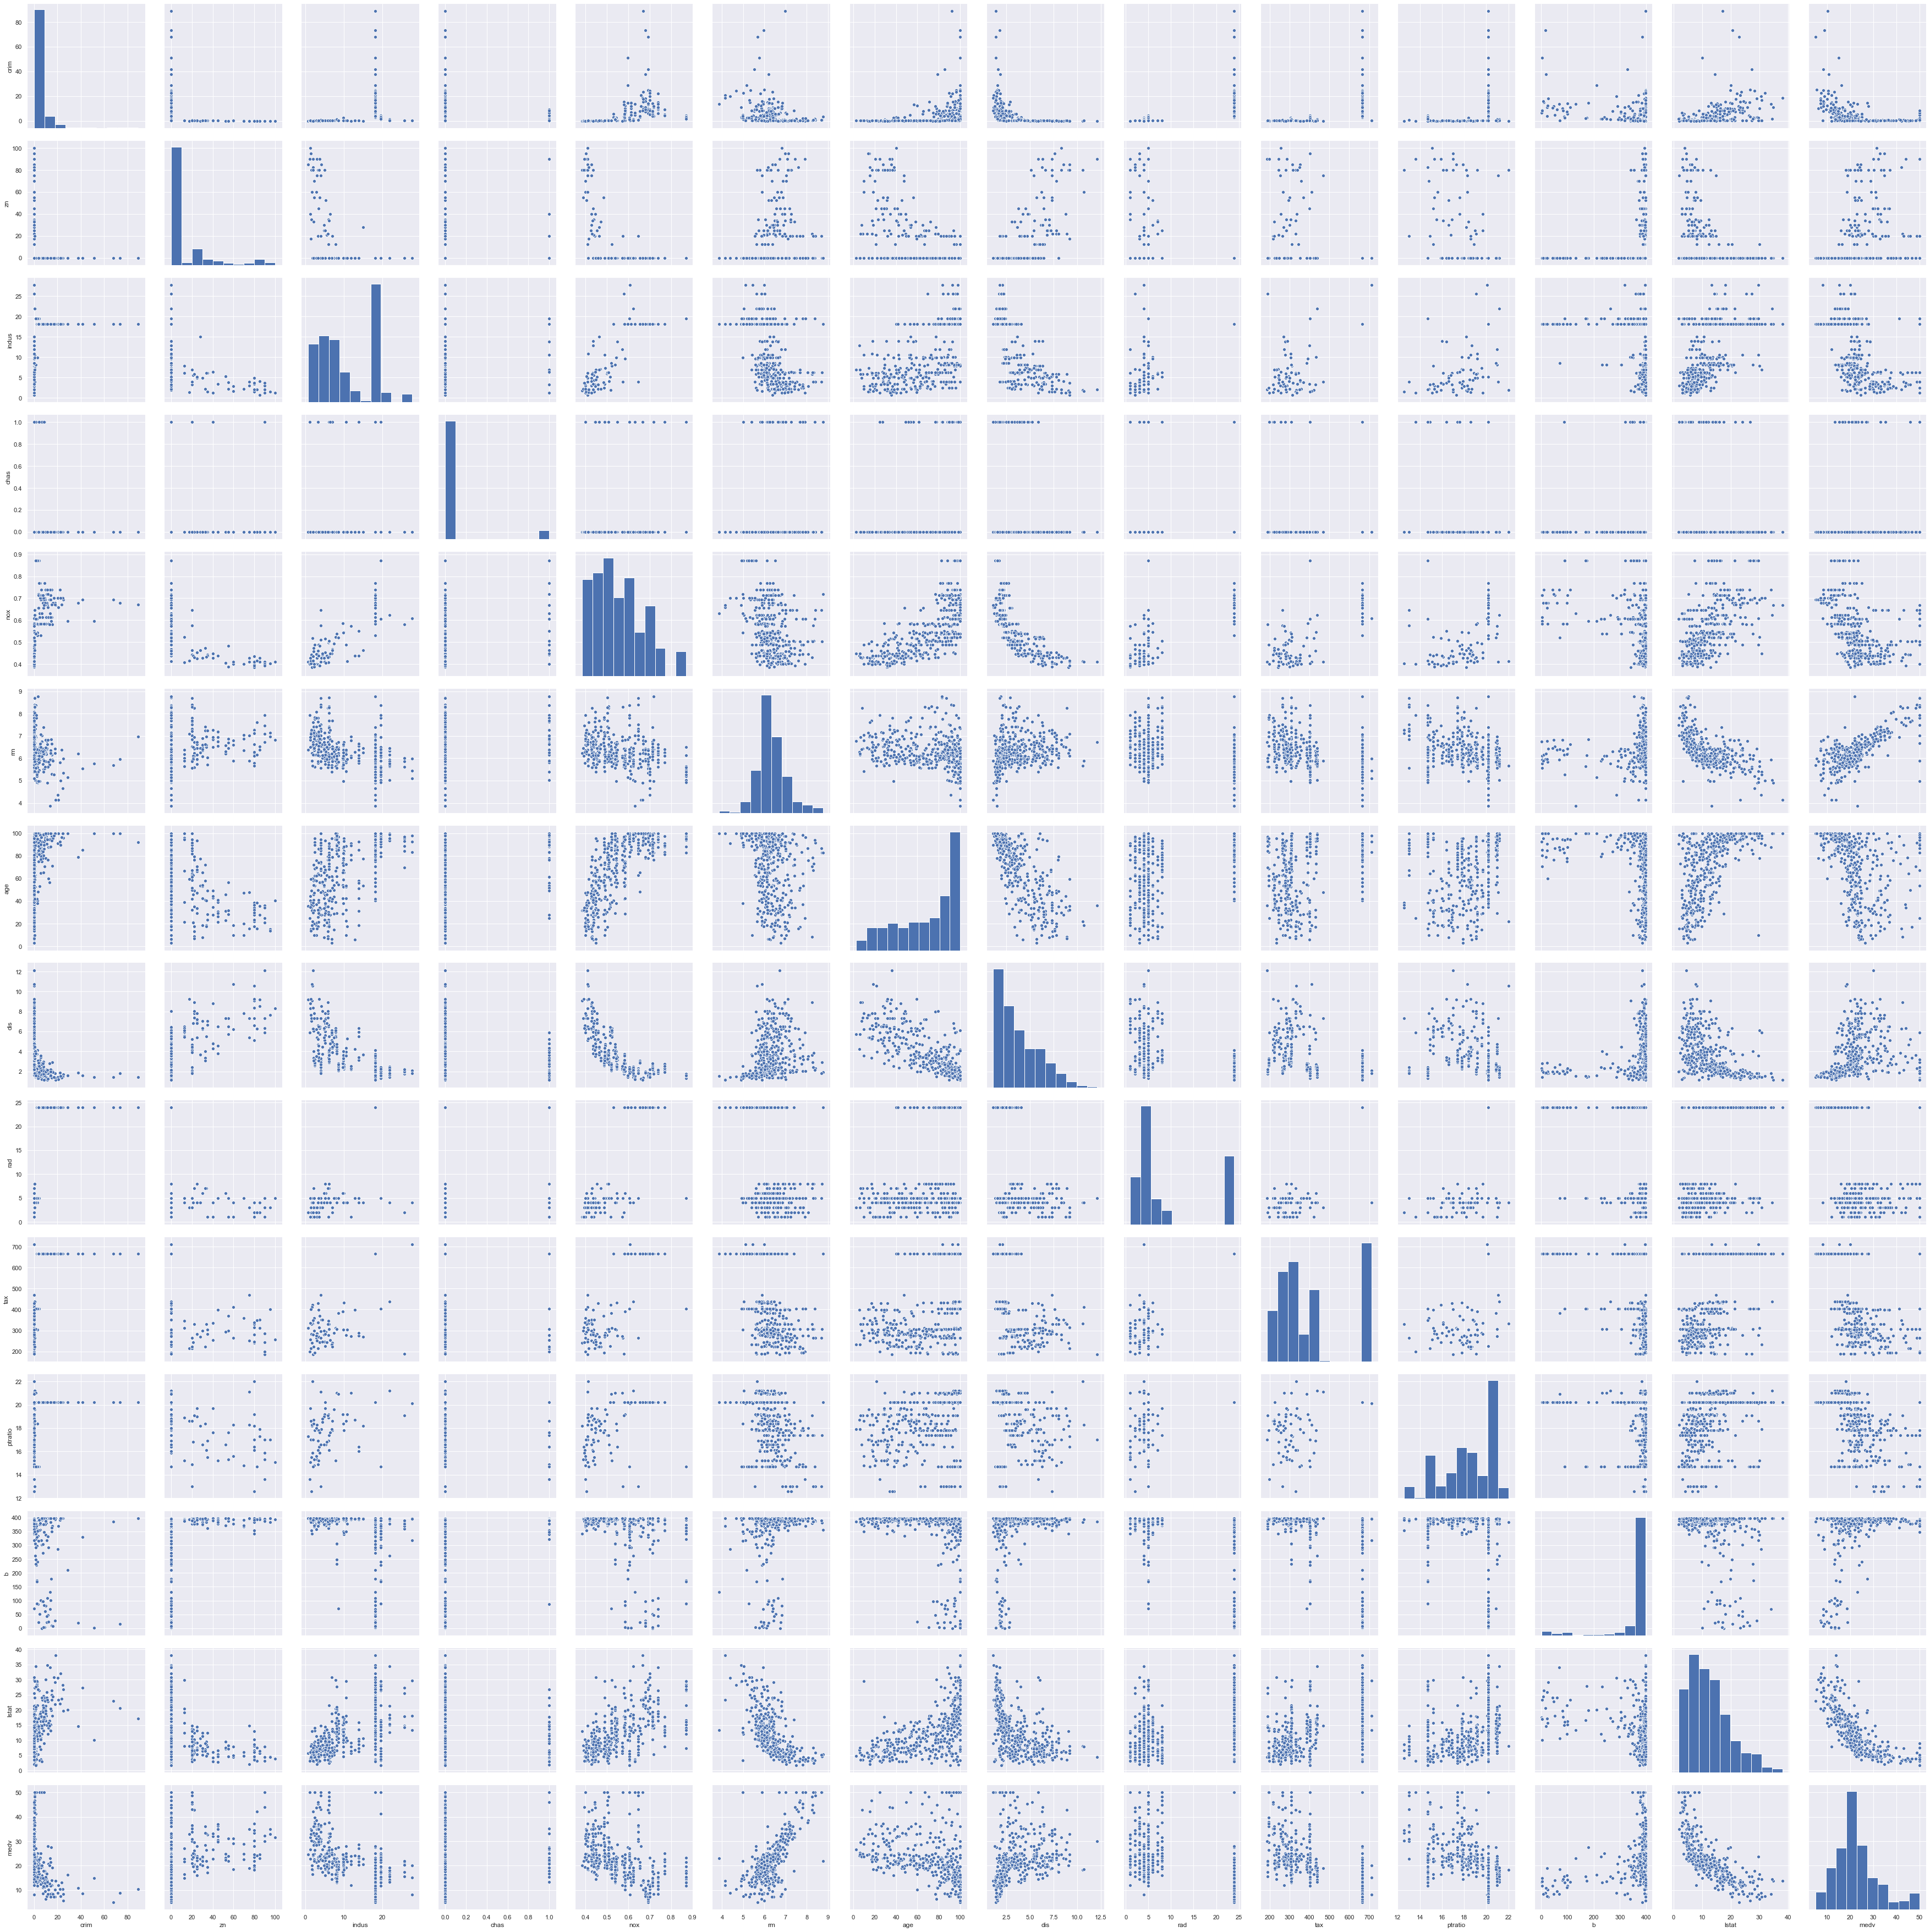

In [26]:
cols = df_train.columns
sns.set()
sns.pairplot(df_train[cols], height = 3.5)
plt.show();

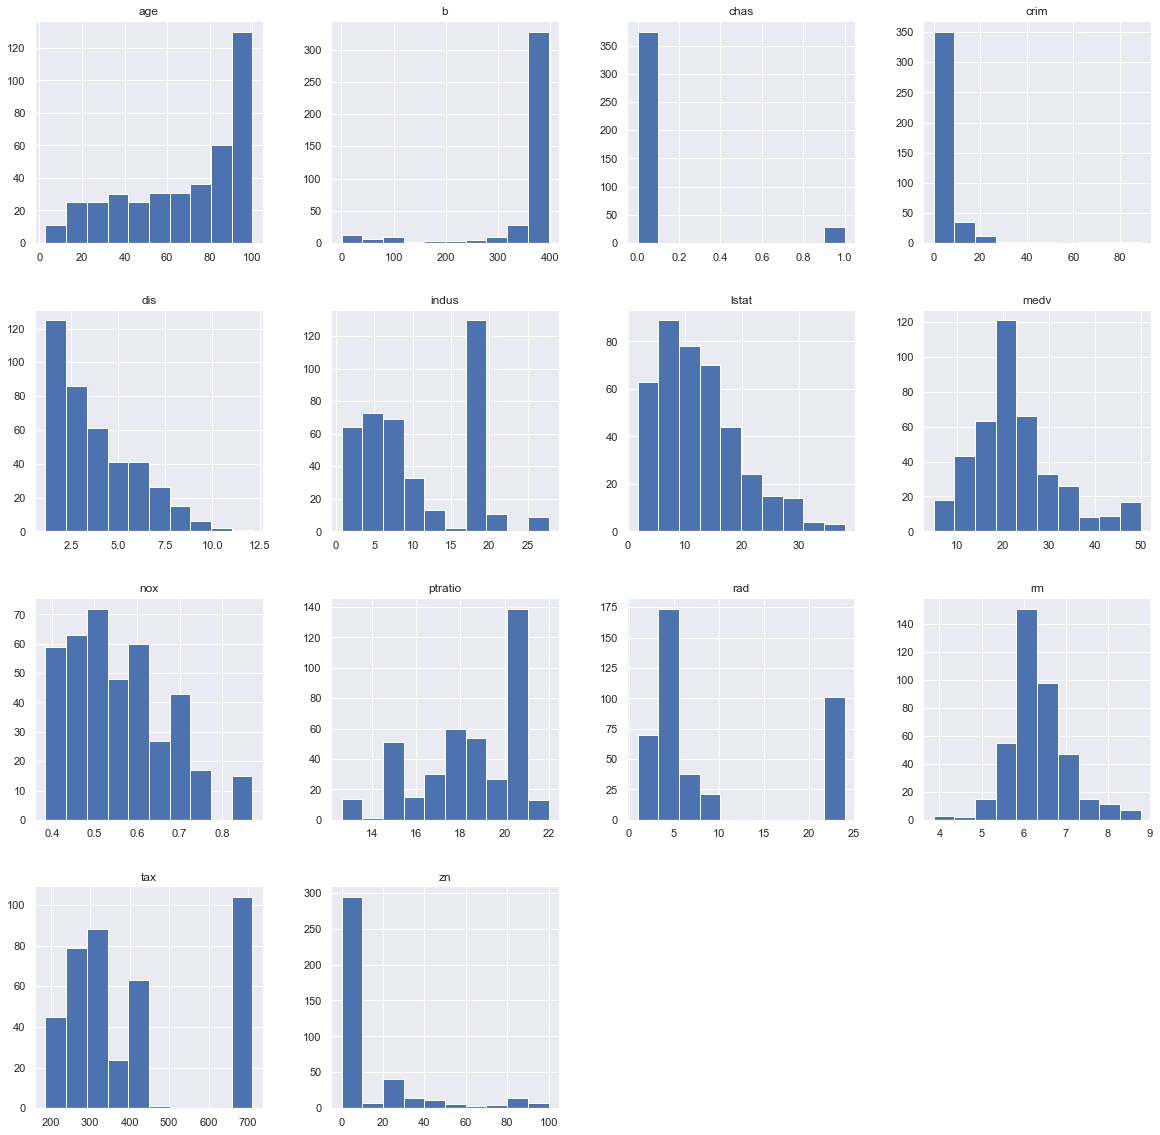

In [27]:
df_train.hist(figsize=[20,20]);

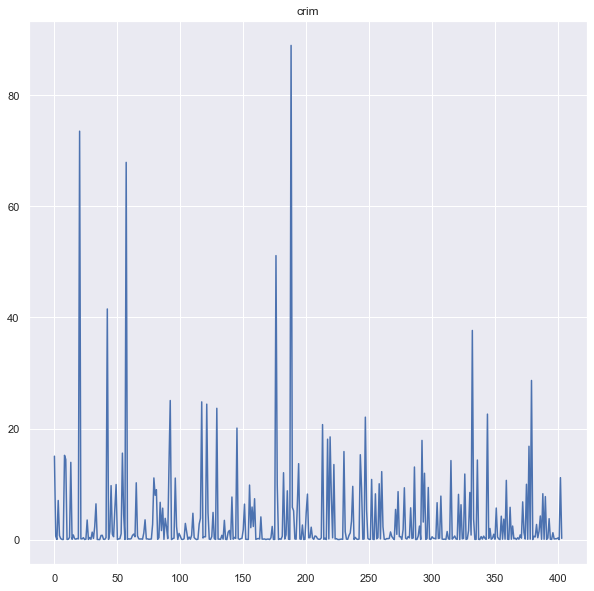

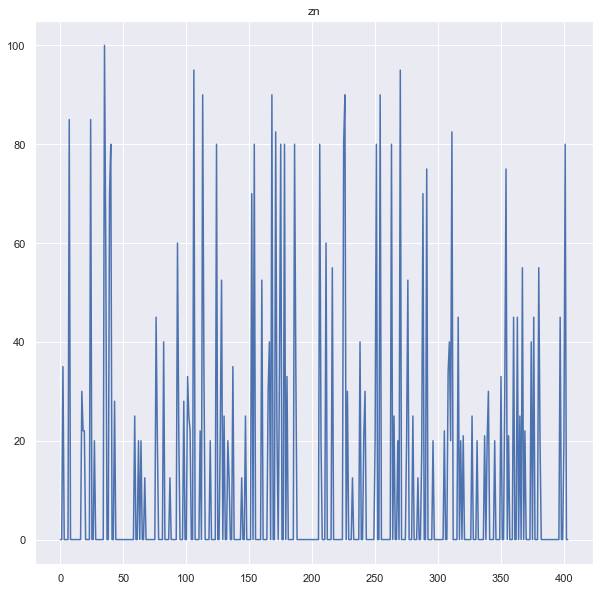

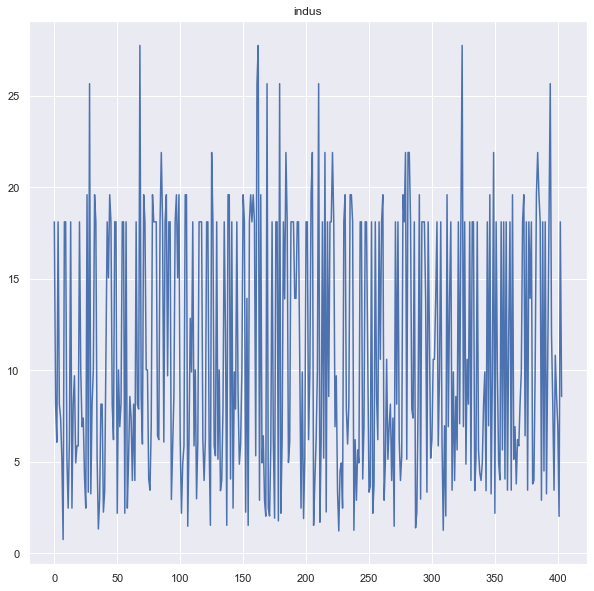

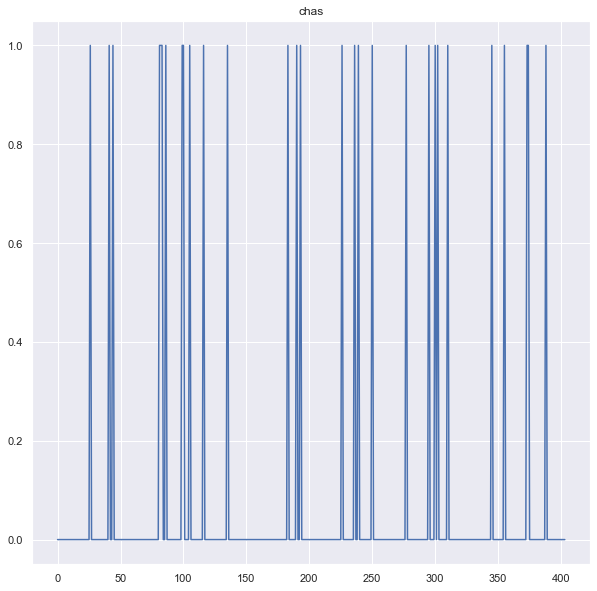

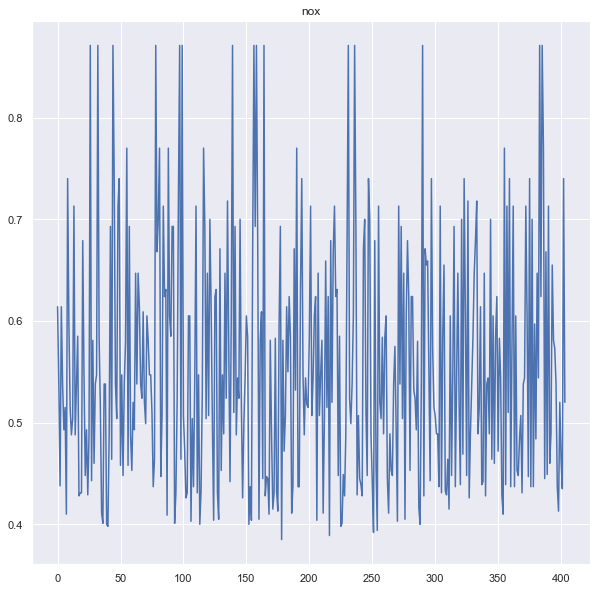

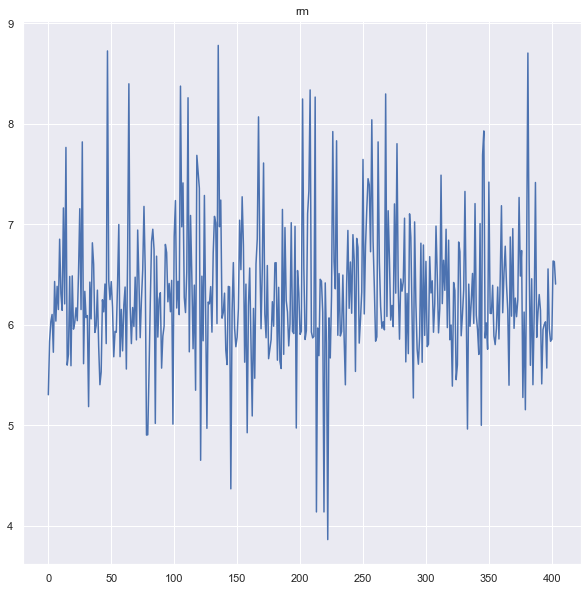

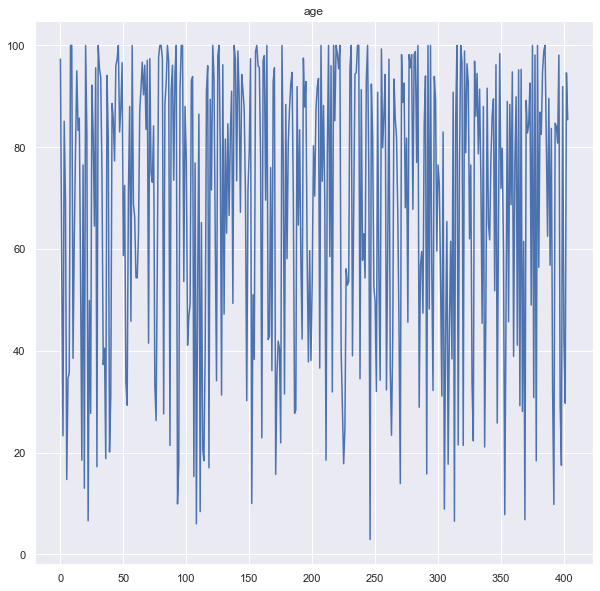

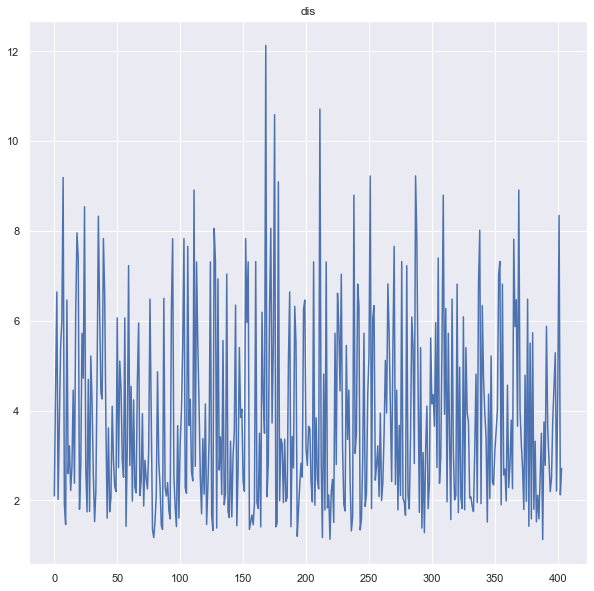

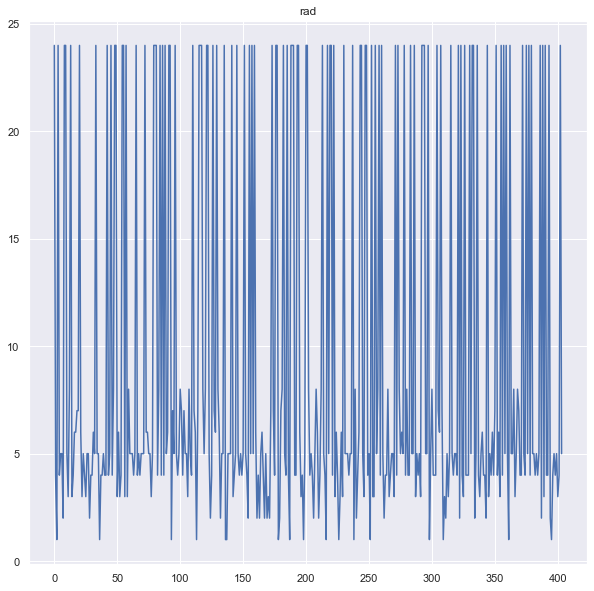

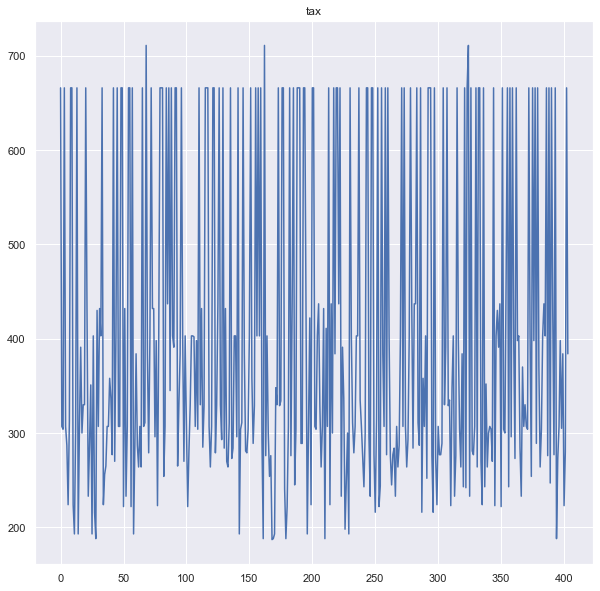

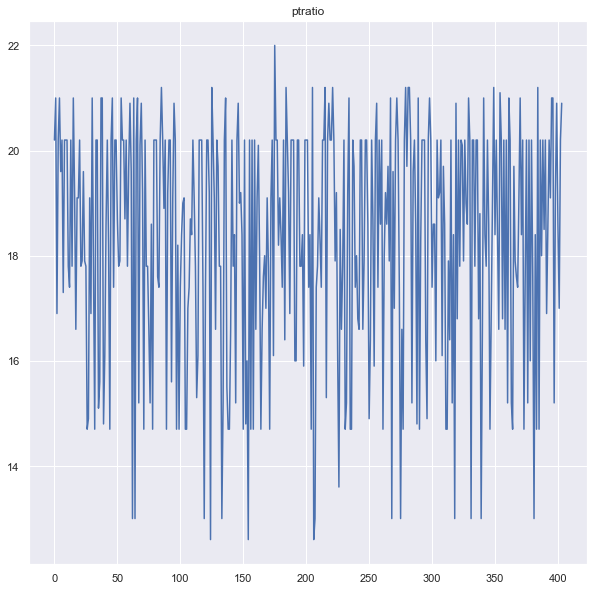

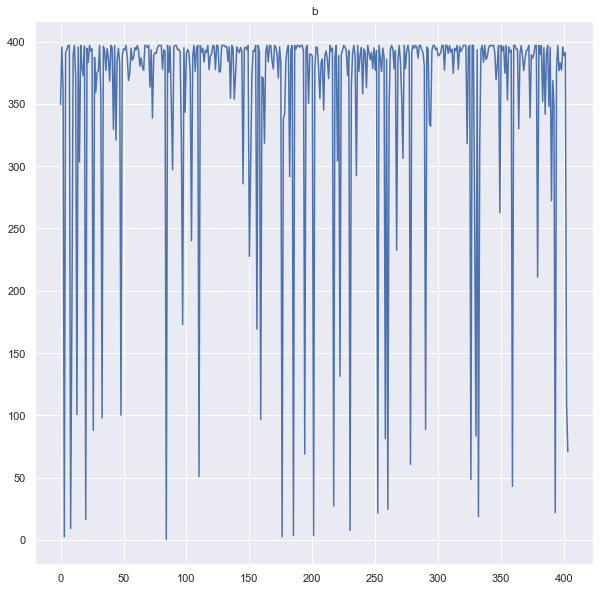

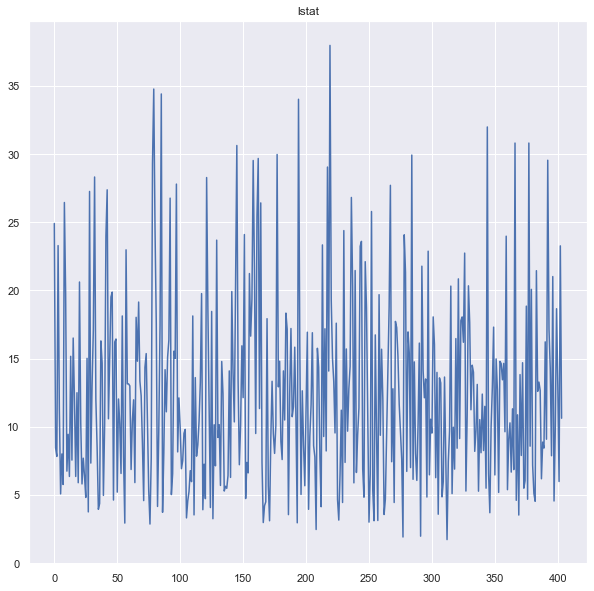

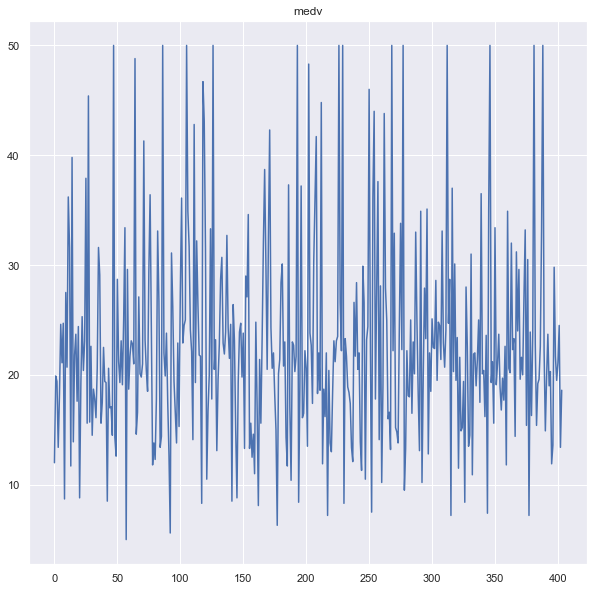

In [28]:
for i in df_train.columns:
    plt.figure(figsize=[10,10])
    plt.plot(df_train[i])
    plt.title(i);

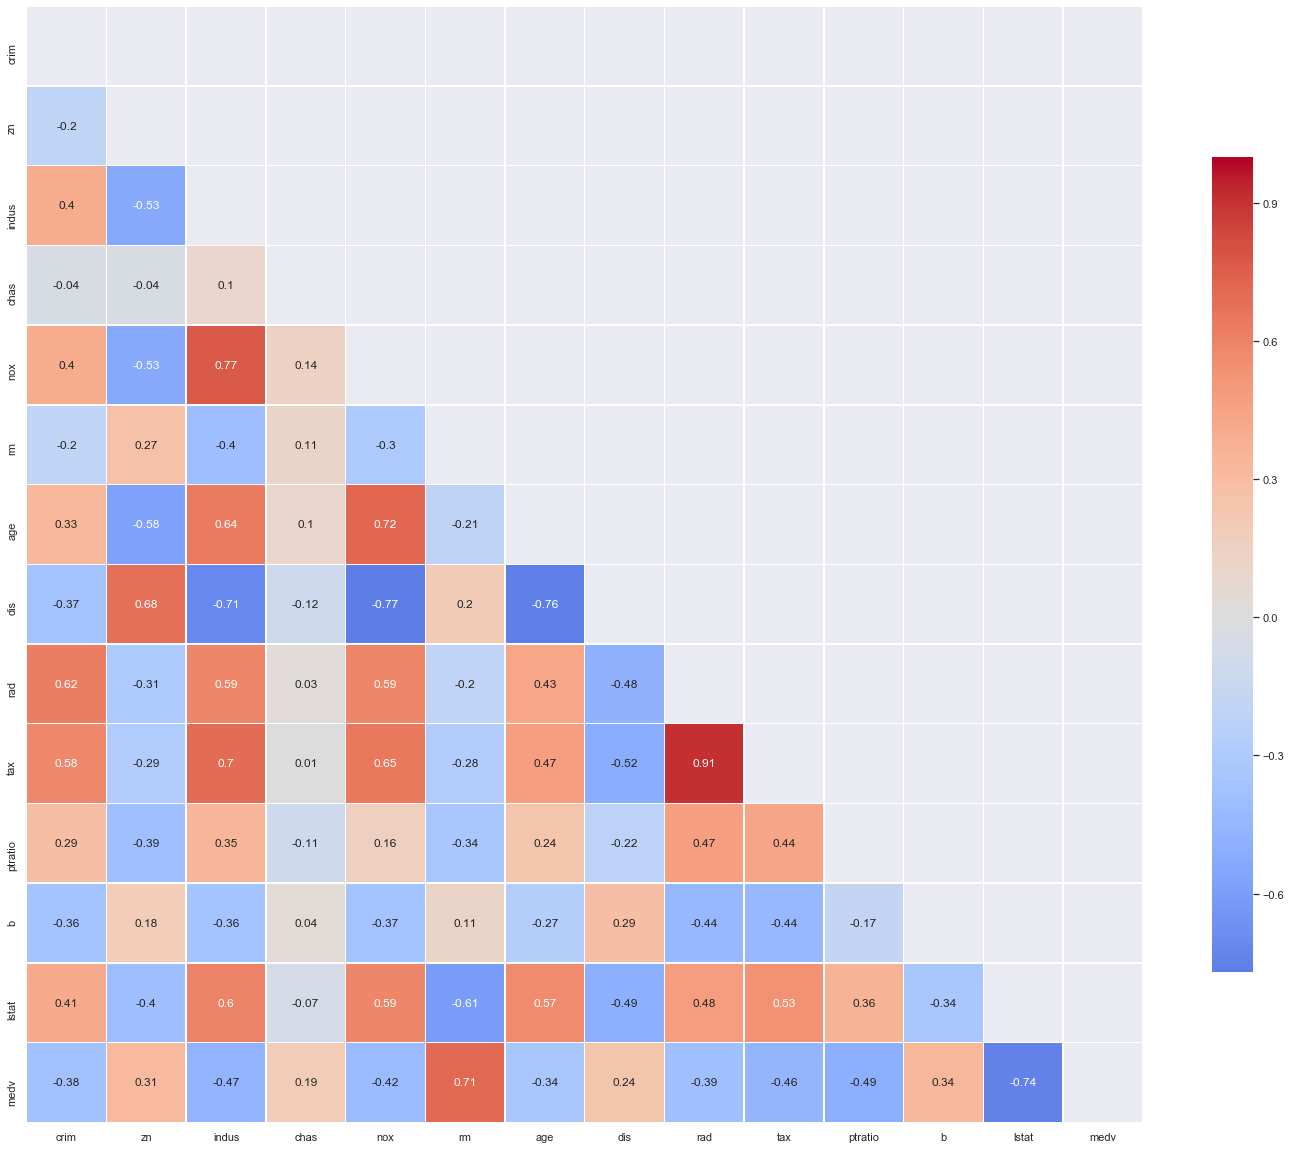

In [29]:
# Correlation between all features
# depndent variable MEDV !!!
corr = df_train.corr()
corr = corr.round(2)
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(25,30))

sns.heatmap(corr, mask=mask, cmap='coolwarm', vmax=1, center=0, square=True, linewidths=.5, 
            annot=True, cbar_kws={"shrink": .5});

In [30]:
corr40 = corr[abs(corr['medv']) > 0.4]

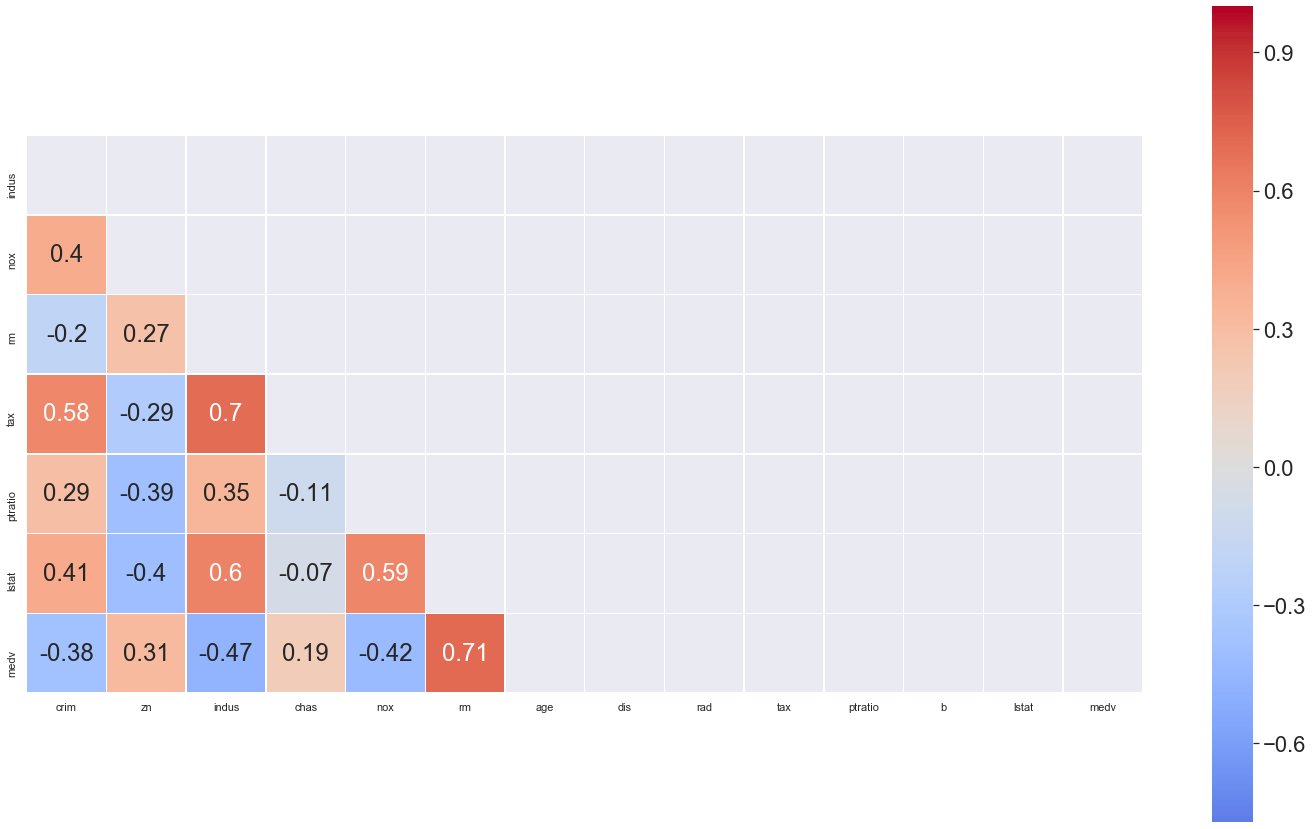

In [31]:
mask = np.zeros_like(corr40)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(25,30))
sns.set(font_scale=2)
sns.heatmap(corr40, mask=mask, cmap='coolwarm', vmax=1, center=0, square=True, linewidths=.5, 
            annot=True, cbar_kws={"shrink": .5});

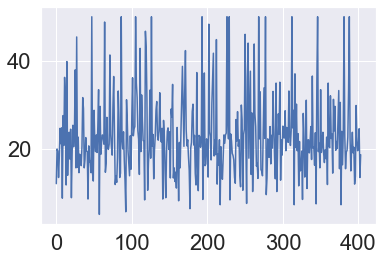

In [32]:
plt.plot(df_train.medv);

In [33]:
# MODEL 1

# Modelling with the 5 MOST significant features

model = 'medv ~ crim + zn + indus + C(chas) + nox + rm + lstat'
smf.ols(formula=model, data=df_train).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.674
Model:                            OLS   Adj. R-squared:                  0.668
Method:                 Least Squares   F-statistic:                     116.8
Date:                Thu, 07 Nov 2019   Prob (F-statistic):           3.19e-92
Time:                        11:55:12   Log-Likelihood:                -1248.9
No. Observations:                 404   AIC:                             2514.
Df Residuals:                     396   BIC:                             2546.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -4.2425      3.660     -1.159      0.247     -11.438       2.953
C(chas)[T.1]     4.0478      1.073      3.774      0.000       1.939       6.156
crim            -0.1175      0.034     -3.425      0.001      -0.185      -0.050
zn               0.0016      0.014      0.116      0.907      -0.026       0.029
indus           -0.0265      0.066     -0.399      0.690      -0.157       0.104
nox              0.1630      3.881      0.042      0.967      -7.467       7.793
rm               5.4129      0.489     11.073      0.000       4.452       6.374
lstat           -0.5485      0.059     -9.250      0.000      -0.665      -0.432
==============================================================================
Omnibus:                      117.610   Durbin-Watson:                   2.198
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              425.892
Skew:                           1.270   Prob(JB):                     3.30e-93
Kurtosis:                       7.342   Cond. No.                         429.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [34]:
df_train.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,15.02340,0.0,18.10,0,0.6140,5.304,97.3,2.1007,24,666,20.2,349.48,24.91,12.0
1,0.62739,0.0,8.14,0,0.5380,5.834,56.5,4.4986,4,307,21.0,395.62,8.47,19.9
2,0.03466,35.0,6.06,0,0.4379,6.031,23.3,6.6407,1,304,16.9,362.25,7.83,19.4
3,7.05042,0.0,18.10,0,0.6140,6.103,85.1,2.0218,24,666,20.2,2.52,23.29,13.4
4,0.72580,0.0,8.14,0,0.5380,5.727,69.5,3.7965,4,307,21.0,390.95,11.28,18.2


In [35]:
# Polynpomial regression with splitting into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

poly_reg = PolynomialFeatures(degree=4)
#X = df_train.crim.values
#X = X.reshape(-1, 1)
X_train_poly = poly_reg.fit_transform(X_train)
X_test_poly = poly_reg.fit_transform(X_test)
pol_reg = LinearRegression()
pol_reg.fit(X_train_poly, y_train)
y_pred_poly_train = pol_reg.predict(X_train_poly)
y_pred_poly_test = pol_reg.predict(X_test_poly)

print('Train MSE:  ' +str(mean_squared_error(y_train, y_pred_poly_train)))
print('Test MSE:  ' +str(mean_squared_error(y_test, y_pred_poly_test)))
print('Train R2:  ' +str(r2_score(y_train, y_pred_poly_train)))
print('Test R2:  ' +str(r2_score(y_test, y_pred_poly_test)))

# run a for loop for best MSE by changing degree

# Next step: K-fold cross validation

Train MSE:  1.961637115239284e-19
Test MSE:  80552.24293068367
Train R2:  1.0
Test R2:  -1080.04813411377


In [36]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=10)

rmse = []
r2 = []
for i in np.arange(1,6):
    poly_features = PolynomialFeatures(degree = i)
  
    X_train_poly = poly_features.fit_transform(X_train)
    poly_model = LinearRegression()
    poly_model.fit(X_train_poly, Y_train)
  
    y_train_predicted = poly_model.predict(X_train_poly)
  
    y_test_predict = poly_model.predict(poly_features.fit_transform(X_test))
  
#rmse_train = np.sqrt(mean_squared_error(Y_train, y_train_predicted))
#r2_train = r2_score(Y_train, y_train_predicted)
#rmse_test = np.sqrt(mean_squared_error(Y_test, y_test_predict))
#r2_test = r2_score(Y_test, y_test_predict)
 
    
    rmse.append(np.sqrt(mean_squared_error(Y_test, y_test_predict)))
    r2.append(r2_score(Y_test, y_test_predict))

#print("The model performance for the training set")
#print("-------------------------------------------")
#print("RMSE of training set is {}".format(rmse_train))
#print("R2 score of training set is {}".format(r2_train))
  
#print("\n")
  
#print("The model performance for the test set")
#print("------------------------------------------")
#print("RMSE of test set is {}".format(rmse_test))
#print("R2 score of test set is {}".format(r2_test))

In [37]:
rmse

[5.866341999333027,
 3.6156419927890355,
 321.2300057213456,
 276.14240858246757,
 184.54527437950046]

Text(0.5, 0, 'degree')

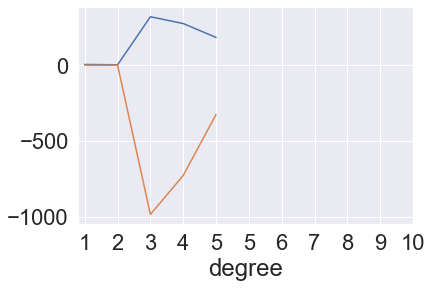

In [38]:
plt.plot(rmse)
plt.plot(r2)
plt.xticks(np.arange(11),('1','2','3','4','5','5','6','7','8','9','10'))
plt.xlabel('degree')

